In [54]:
pip install langchain==0.0.316 openai==0.28.1

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from getpass import getpass
OPENAI_API_KEY = getpass()
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
from langchain.llms import OpenAI
from langchain.chains import ConversationChain
conversation_with_summary = ConversationChain(
    llm=OpenAI(temperature=0, model_name="gpt-3.5-turbo"),
    memory=ConversationBufferWindowMemory(k=2),
)


In [60]:
import re  
bot_responses = []
print("Chatbot: Hi! I'm a conversational bot. You can start chatting with me. Type 'quit' to end the conversation.")
while True:
    user_input = input("You: ")
    if user_input.lower() == 'quit':
        print("Chatbot: Goodbye!")
        break
     
    raw_response = conversation_with_summary.predict(input=user_input)
    response = re.split(r'\n|AI:', raw_response)[0].strip()
    if "Human:" in response:
        response = response.split("Human:")[0].strip()
    
    bot_responses.append(response)
    print("Chatbot:", response)


Chatbot: Hi! I'm a conversational bot. You can start chatting with me. Type 'quit' to end the conversation.
You: Hello
Chatbot: Hello! How are you doing today?
You: Im fine what about you 
Chatbot: I'm doing well, thank you for asking. Is there anything specific you would like to talk about or ask me?
You: Ya Im here to talk about cricket. Do you know something about it?
Chatbot: Yes, I know a lot about cricket! Cricket is a popular sport played with a bat and ball between two teams of eleven players each. The game is played on a circular field with a rectangular 22-yard-long pitch in the center. The objective of the game is for one team to score more runs than the other team. There are different formats of cricket, including Test matches, One Day Internationals (ODIs), and Twenty20 (T20) matches. Each format has its own set of rules and regulations. Do you have any specific questions about cricket that you would like me to answer?
You: Hmm Great 
Chatbot: I'm glad you think so! Cricke

In [61]:
bot_responses

['Hello! How are you doing today?',
 "I'm doing well, thank you for asking. Is there anything specific you would like to talk about or ask me?",
 'Yes, I know a lot about cricket! Cricket is a popular sport played with a bat and ball between two teams of eleven players each. The game is played on a circular field with a rectangular 22-yard-long pitch in the center. The objective of the game is for one team to score more runs than the other team. There are different formats of cricket, including Test matches, One Day Internationals (ODIs), and Twenty20 (T20) matches. Each format has its own set of rules and regulations. Do you have any specific questions about cricket that you would like me to answer?',
 "I'm glad you think so! Cricket is a fascinating sport with a rich history and a passionate fan base. If you have any specific questions or topics you'd like to discuss further, feel free to ask!",
 'The first ICC T20 World Cup was held in 2007 in South Africa. The tournament was won by

In [62]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [63]:
from transformers import pipeline
import matplotlib.pyplot as plt

sentiment_pipeline = pipeline("sentiment-analysis", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")


config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

C:\Users\varsh\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\varsh\.cache\huggingface\hub\models--mrm8488--distilroberta-finetuned-financial-news-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [64]:
sentiments = []
for response in bot_responses:
    sentiment_result = sentiment_pipeline(response)
    sentiment_label = sentiment_result[0]['label']
    sentiments.append(sentiment_label)
    print("Response:", response)
    print("Sentiment:", sentiment_label)
    print()

Response: Hello! How are you doing today?
Sentiment: neutral

Response: I'm doing well, thank you for asking. Is there anything specific you would like to talk about or ask me?
Sentiment: neutral

Response: Yes, I know a lot about cricket! Cricket is a popular sport played with a bat and ball between two teams of eleven players each. The game is played on a circular field with a rectangular 22-yard-long pitch in the center. The objective of the game is for one team to score more runs than the other team. There are different formats of cricket, including Test matches, One Day Internationals (ODIs), and Twenty20 (T20) matches. Each format has its own set of rules and regulations. Do you have any specific questions about cricket that you would like me to answer?
Sentiment: neutral

Response: I'm glad you think so! Cricket is a fascinating sport with a rich history and a passionate fan base. If you have any specific questions or topics you'd like to discuss further, feel free to ask!
Senti

In [70]:
sentiment_counts = {label: sentiments.count(label) for label in set(sentiments)}
total_responses = len(sentiments)
sentiment_percentages = {label: count / total_responses * 100 for label, count in sentiment_counts.items()}

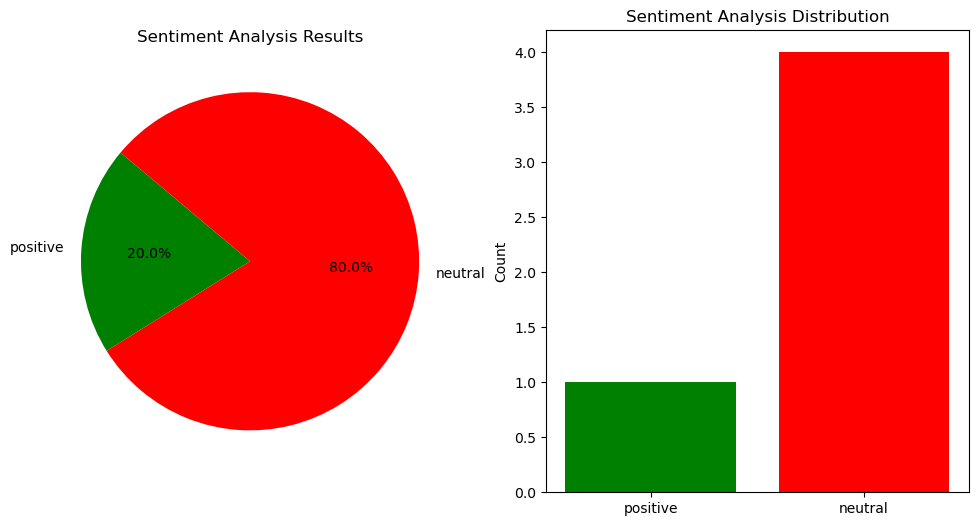


Sentiment Analysis Report:
Total Responses: 5
Sentiment Counts: {'positive': 1, 'neutral': 4}
Sentiment Percentages: {'positive': 20.0, 'neutral': 80.0}


In [75]:

labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['green', 'red', 'yellow']  # Positive, Negative, Neutral

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax1.set_title('Sentiment Analysis Results')

# Bar chart
x = np.arange(len(labels))
ax2.bar(x, sentiment_counts.values(), color=colors)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylabel('Count')
ax2.set_title('Sentiment Analysis Distribution')

plt.show()

# Print detailed statistics and insights
print("\nSentiment Analysis Report:")
print("==========================")
print("Total Responses:", total_responses)
print("Sentiment Counts:", sentiment_counts)
print("Sentiment Percentages:", sentiment_percentages)